# Problema 1: Classificazione (11 punti)

In questa prima parte del compito si richiede l'implementazione di una rete neurale singolo strato (*perceptron*) e valutare la sua efficacia su un problema di classificazione con due classi, C1 e C2, in cui ogni oggetto è rappresentato da due caratteristiche (*feature*), X1 e X2.

## Esercizio 1.1 (2 punti)

I requisiti per il dataset sono i seguenti:

+ il numero N di punti del dataset è pari a 250 per classe
+ la distribuzione dei valori di X1 per le due classi è la seguente:
    1. per classe 1, una distribuzione normale con media 0.5 e deviazione standard 1.5
    2. per classe 2, una distribuzione normale con media 5.4 e deviazione standard 0.5
+ la distribuzione dei valori di X2 per le due classi è la seguente:
    1. per classe 1, una distribuzione Poisson con lambda 1.5
    2. per classe 2, una distribuzione esponenziale con parametro *scale* uguale a 2
+ per la classe 1, viene utilizzata l'etichetta +1, per la classe 2 l'etichetta -1.
+ prima di generare i dati è fondamentale impostare il random seed che sarà uguale alle ultime tre cifre della vostra matricola (es. se la matricola è 200123, il seed sarà 123)

In [1]:
# scrivete la vostra risposta qui

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(263) # setting the seed

# number of points per class
N = 250

# features arrays
X1_1 = np.random.normal(loc=0.5, scale=1.5, size=N)
X1_2 = np.random.normal(loc=5.4, scale=0.5, size=N)

X2_1 = np.random.poisson(lam=1.5, size=N)
X2_2 = np.random.exponential(scale=2, size=N)

# label arrays
y1 = np.ones(N)
y2 = -np.ones(N)


## Esercizio 1.2 (1 punto)

Disegnare uno scatter plot mostrando sul piano bidimensionale la distribuzione dei punti delle due classi

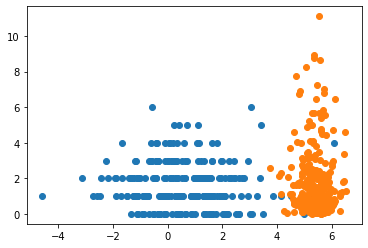

In [2]:
# scrivete la vostra risposta qui

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)


## Esercizio 1.3 (1 punto)

Creare la matrice dei punti X (ogni riga è un oggetto, includere il termine di bias X0) e il vettore di output y.


In [3]:
# scrivete la vostra risposta qui
X0 = np.ones(2 * N)
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))
X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((y1, y2))


## Esercizio 1.4 (5 punti)

Addestrare un *perceptron* con un **approccio mini-batch stochastic gradient descent** con i seguenti requisiti:
+ inizializzare il vettore dei parametri w con una distribuzione uniforme su un range [-2. 2].
+ Utilizzare un parametro eta pari a 1e-4
+ Usare un batch size di 20 oggetti
+ Massimo numero di epoche pari a 200
+ Salvare in un vettore [errors_epoch] il numero di oggetti classificati erroneamente per ogni epoca.

In [4]:
# scrivete la vostra risposta qui

# weights vector
w = np.random.uniform(low=-2, high=2, size=3)

# training hyperparameters
eta = 1e-4
batch_size = 20
max_epochs = 200
errors_epoch = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
    errors_epoch[epoch] = sum(y * np.sign(np.dot(X, w)) < 0)

    rand_perm = np.random.permutation(y.shape[0])
    X = X[rand_perm, :]
    y = y[rand_perm]

    for j in range(0, y.shape[0], batch_size):
        x_batch = X[j:j + batch_size, :]
        y_batch = y[j:j + batch_size]

        error = y_batch - np.dot(x_batch, w)
        w += eta * np.dot(np.transpose(x_batch), error)

errors_epoch[-1] = sum(y * np.sign(np.dot(X, w)) < 0)
print(f"numero di epoche = {epoch + 1}")
print(f"numero di errori = {errors_epoch[-1]}")


numero di epoche = 200
numero di errori = 15.0


## Esercizio 1.5 (punti 2)

Fare un grafico con due plot: uno che mostra i punti del dataset e la retta di separazione trovata, l'altro che mostra l'andamento del numero di errori fatti per ogni epoca.

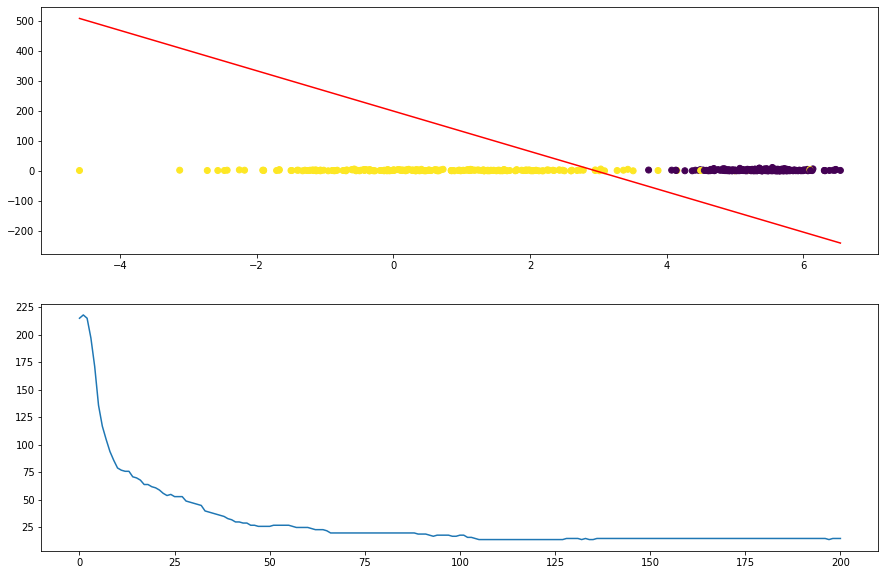

In [5]:
# scrivete la vostra risposta qui

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharey=False)
axs[0].scatter(X[:, 1], X[:, 2], c=y)
axs[0].plot([np.min(X[:, 1]),
             np.max(X[:, 1])],
            [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2],
             np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]],
            c="red")

axs[1].plot(range(len(errors_epoch)), errors_epoch)


# Problema 2: Regressione (7 punti)

In questa seconda parte del compito, viene richiesta la costruzione di una soluzione in forma chiusa di un problema di regressione.


## Esercizio 2.1 (1 punto)

I requisiti per il dataset sono i seguenti:
+ la funzione target *y_reg* è una funzione cubica aX^3 + bX^2 + cX + d con valori values a = 1.5, b = -1, c = 2, d = 3. 
+ Inoltre, all'output della funzione target viene aggiunto un rumore gaussiano con media zero e deviazione standard 1.7.
+ La funzione target viene campionata utilizzando la coordinata X1 del dataset precedentemente creato (Problema 1)

In [6]:
# scrivete la vostra risposta qui

a = 1.5
b = -1
c = 2
d = 3

y_reg = a * X1**3 + b * X1**2 + c * X1 + d + np.random.normal(loc=0.0, scale=1.7, size=2 * N)


## Esercizio 2.2 (1 punto)

L'ipotesi *H(x)* è una funzione quadratica. Generare il dataset *X_reg* secondo questa ipotesi (includendo il termine di bias X0)


In [7]:
# scrivete la vostra risposta qui

X_reg = np.stack((X0, X1, X1**2), axis=1)


## Esercizio 2.3 (4 punti)

Trovare il vettore di parametri ottimo *w_reg* per l'ipotesi *H(x)* utilizzando la soluzione in forma chiusa.

In [8]:
# scrivete la vostra risposta qui

w_reg = np.dot(np.linalg.inv(np.dot(np.transpose(X_reg), X_reg)), np.dot(np.transpose(X_reg), y_reg))


## Esercizio 2.4 (1 punto)

Fare il grafico dei punti del dataset sovrapposto alla funzione di regressione trovata.

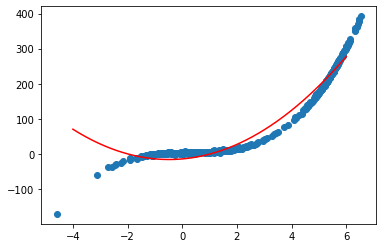

In [9]:
# scrivete la vostra risposta qui

x_grid = np.linspace(-4, 6, 1000)
y_grid = w_reg[0] + w_reg[1] * x_grid + w_reg[2] * x_grid**2

plt.scatter(X1, y_reg)
plt.plot(x_grid, y_grid, c="red")